In [35]:
from encodings.utf_8 import encode
import pandas as pd
import matplotlib.pyplot as plt



df1 = pd.read_excel('/Users/Marcos Rodio/Desktop/base_vendas/Araçatuba.xlsx', engine='openpyxl')
df2 = pd.read_excel('/Users/Marcos Rodio/Desktop/base_vendas/Andradina.xlsx', engine='openpyxl')
df3 = pd.read_excel('/Users/Marcos Rodio/Desktop/base_vendas/Birigui.xlsx', engine='openpyxl')
df4 = pd.read_excel('/Users/Marcos Rodio/Desktop/base_vendas/Valparaiso.xlsx', engine='openpyxl')

print(df1.head(5))
print(df2.head(5))
print(df3.head(5))
print(df4.head(5))







      Cidade       Data  Vendas  Loja ID  Qtde
0  Araçatuba 2022-01-10     150        1     1
1  Araçatuba 2022-01-15     200        2     6
2  Araçatuba 2022-01-20     300        3    10
3  Araçatuba 2022-01-30     400        4     3
4  Araçatuba 2022-02-10     150        1     1
      Cidade       Data  Vendas  Loja ID  Qtde
0  Andradina 2022-01-10    1150        1    11
1  Andradina 2022-01-15    2001        2    16
2  Andradina 2022-01-20    1300        3    20
3  Andradina 2022-01-30    1400        4    13
4  Andradina 2022-02-10    1150        1    15
    Cidade       Data  Vendas  Loja ID  Qtde
0  Birigui 2022-01-10      50        1     1
1  Birigui 2022-01-15      60        2     2
2  Birigui 2022-01-20      70        3     3
3  Birigui 2022-01-30      80        4     4
4  Birigui 2022-02-10      90        1     5
       Cidade       Data  Vendas  Loja ID  Qtde
0  Valparaiso 2022-01-10    1150        1     1
1  Valparaiso 2022-01-15    2200        2     6
2  Valparaiso 2022-01-

In [36]:
#juntando as bases

df = pd.concat([df1,df2,df3,df4])


In [37]:

print(df.head(5))#5 primeiras linhas
print('------------------------------------------------------')
print(df.tail(5))#5 ultimas linhas
print('------------------------------------------------------')
print(df.dtypes)#verificar tipo de dado de cada coluna
print(df.sample(10))#pegar amostra
df['Loja ID'] = df['Loja ID'].astype("object")
print(df)
print(df.dtypes)#verificar tipo de dado de cada coluna


      Cidade       Data  Vendas  Loja ID  Qtde
0  Araçatuba 2022-01-10     150        1     1
1  Araçatuba 2022-01-15     200        2     6
2  Araçatuba 2022-01-20     300        3    10
3  Araçatuba 2022-01-30     400        4     3
4  Araçatuba 2022-02-10     150        1     1
------------------------------------------------------
        Cidade       Data  Vendas  Loja ID  Qtde
11  Valparaiso 2021-01-30     500        4     3
12  Valparaiso 2021-02-10     300        1    20
13  Valparaiso 2021-02-15     400        2    16
14  Valparaiso 2021-02-20       5        3     1
15  Valparaiso 2021-02-28    3000        4    30
------------------------------------------------------
Cidade             object
Data       datetime64[ns]
Vendas              int64
Loja ID             int64
Qtde                int64
dtype: object
        Cidade       Data  Vendas  Loja ID  Qtde
5   Valparaiso 2022-02-15     400        2    16
0    Andradina 2022-01-10    1150        1    11
15  Valparaiso 2021-02-

In [38]:
print(df.isnull().sum())#Verificando valores nulos

'''
#substituindo valores nulos pela media
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)
#substituindo valor nulos por 0
df['Vendas'].fillna(0, inplace=True)
#apagando as linhas com valores nulos
df.dropna(implace=True)
#apagando as linhas com valores nulos com base em apenas 1 coluna
df.dropna(subset=["Vendas"], inplace=True)
#apagando as linhas com valores faltantes em todas as linhas 
df.dropna(how='all', inplace=True)
'''
#criando colunas novas (receita)
df["Receita"] = df["Vendas"].mul(df['Qtde'])
print(df.head())
#df["Receita/Vendas"] = df["Receita"] / df{"Vendas"}

#Retornando a maior receita
print('---------------------------------------------------------')
print('Maior Receita', df['Receita'].max())
print('Menor Receita', df['Receita'].min())
print('---------------------------------------------------------')
print('2 Maiores Receitas')
print(df.nlargest(2,['Receita']))
print('---------------------------------------------------------')
print('2 Menores Receitas')
print(df.nsmallest(2,['Receita']))

print('---------------------------------------------------------')
print('Agrupamento por cidade retornando soma das receitas')
print(df.groupby('Cidade')['Receita'].sum())

#Ordenando Dados
print('---------------------------------------------------------')
print(df.sort_values("Receita", ascending=False).head(10))


Cidade     0
Data       0
Vendas     0
Loja ID    0
Qtde       0
dtype: int64
      Cidade       Data  Vendas Loja ID  Qtde  Receita
0  Araçatuba 2022-01-10     150       1     1      150
1  Araçatuba 2022-01-15     200       2     6     1200
2  Araçatuba 2022-01-20     300       3    10     3000
3  Araçatuba 2022-01-30     400       4     3     1200
4  Araçatuba 2022-02-10     150       1     1      150
---------------------------------------------------------
Maior Receita 90000
Menor Receita 5
---------------------------------------------------------
2 Maiores Receitas
        Cidade       Data  Vendas Loja ID  Qtde  Receita
7   Valparaiso 2022-02-28    3000       4    30    90000
15  Valparaiso 2021-02-28    3000       4    30    90000
---------------------------------------------------------
2 Menores Receitas
        Cidade       Data  Vendas Loja ID  Qtde  Receita
6   Valparaiso 2022-02-20       5       3     1        5
14  Valparaiso 2021-02-20       5       3     1        5
--

In [39]:

#Trabalhando Com Datas

print("Converter types int/float/object em data")
print(df.dtypes)
#df['Data'] = df['Data'].astype("Int64") converte para int
df['Data'] = pd.to_datetime(df['Data'])
print('---------------------------------------------------------')
print("Agrupando por ano")
print(df.groupby(df['Data'].dt.year)['Vendas'].sum())
print('---------------------------------------------------------')
print("Criando uma nova coluna com o ano")
df["Ano_Venda"]= df["Data"].dt.year
print(df.sample(5))
print('---------------------------------------------------------')
print("Extraindo o mês e o dia")
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)
print(df.sample(5))
print('---------------------------------------------------------')
print("Calculando a diferença de dias")
df["Diferença_Dias"] = df["Data"] - df["Data"].min()
print(df)
print('---------------------------------------------------------')
print("Criando a Coluna de Trimestre")
df["Trimestre_Venda"] = df["Data"].dt.quarter
print(df)
print('---------------------------------------------------------')
print("Filtrando as vendas de Fevereiro")
vendas_fevereiro_22 = df.loc[(df["Data"].dt.year== 2022) & (df["Data"].dt.month==2)]
print(vendas_fevereiro_22)
#Contagem de vendas por loja
print(df["Loja ID"].value_counts(ascending=False))


Converter types int/float/object em data
Cidade             object
Data       datetime64[ns]
Vendas              int64
Loja ID            object
Qtde                int64
Receita             int64
dtype: object
---------------------------------------------------------
Agrupando por ano
Data
2021    24606
2022    24606
Name: Vendas, dtype: int64
---------------------------------------------------------
Criando uma nova coluna com o ano
       Cidade       Data  Vendas Loja ID  Qtde  Receita  Ano_Venda
4     Birigui 2022-02-10      90       1     5      450       2022
14  Andradina 2021-02-20    1300       3    10    13000       2021
1   Andradina 2022-01-15    2001       2    16    32016       2022
4   Andradina 2022-02-10    1150       1    15    17250       2022
11    Birigui 2021-01-30      80       4     4      320       2021
---------------------------------------------------------
Extraindo o mês e o dia
        Cidade       Data  Vendas Loja ID  Qtde  Receita  Ano_Venda  \
0    A

<AxesSubplot:title={'center':'Verticais'}>

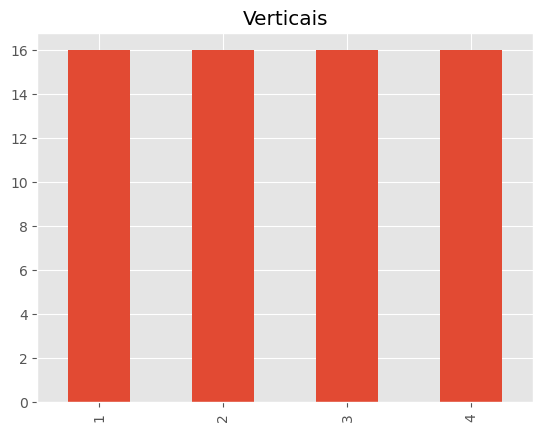

In [40]:
#Grafico de Barras
df["Loja ID"].value_counts().plot.bar(title="Verticais")

<AxesSubplot:title={'center':'Horizontais'}, xlabel='Total Vendas', ylabel='Cidade'>

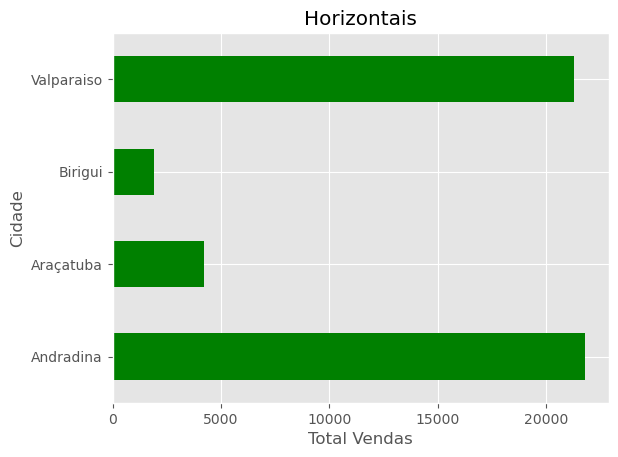

In [41]:
#Barras Horizontais
from turtle import title


#df["Loja ID"].value_counts(ascending=False).plot.barh(title="Horizontais") 
df.groupby(["Cidade"]) ["Vendas"].sum().plot.barh(title="Horizontais", xlabel="Total Vendas", color="green") 

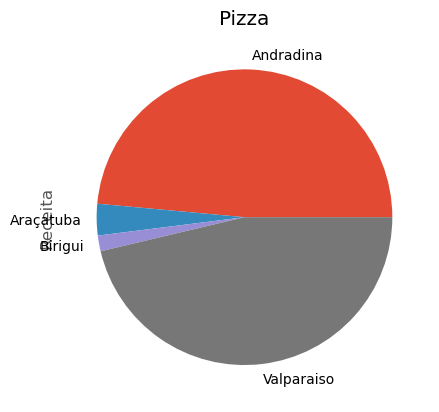

In [55]:
#df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie(title="Pizza")

df.groupby(df["Cidade"])["Receita"].sum().plot.pie(title="Pizza");#; oculta alinha acima do gráfico


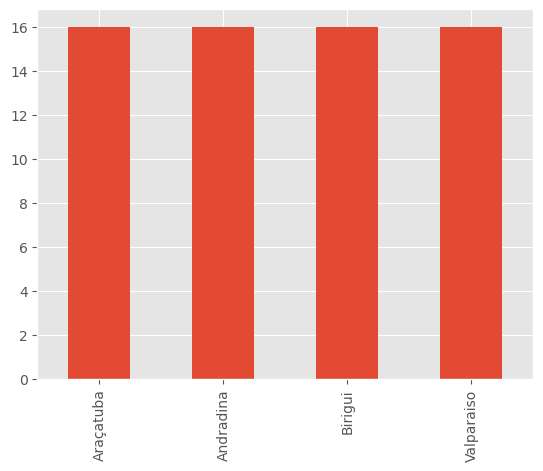

In [56]:
plt.style.use("ggplot")
df["Cidade"].value_counts().plot.bar();


<AxesSubplot:xlabel='Data'>

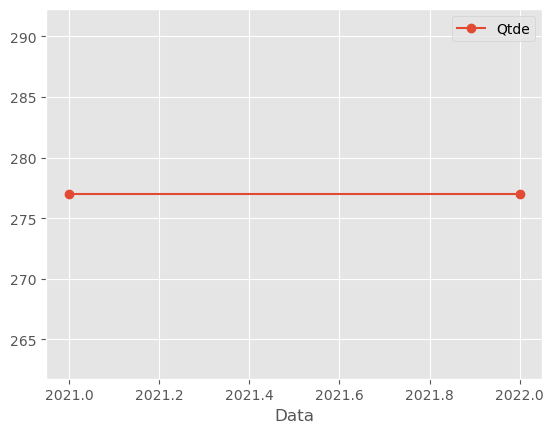

In [51]:
#Inserindo Marcador e trabalhando com datas.
from turtle import left


df.groupby(df["Data"].dt.year)["Qtde"].sum().plot(marker="o", legend=left) #tipos de marcadores v,*,y

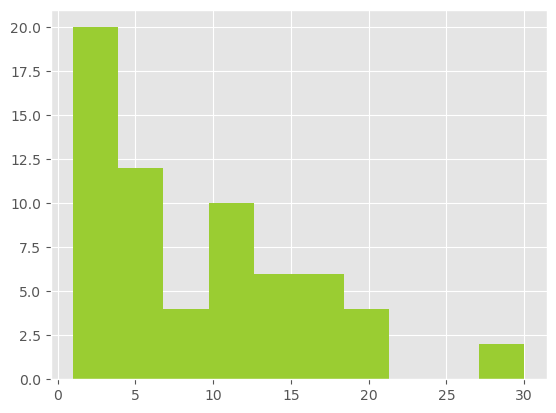

In [57]:
#Histograma
plt.hist(df["Qtde"], color="yellowgreen");

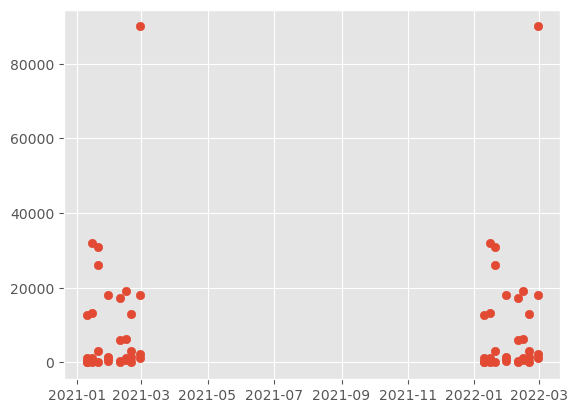

In [59]:
#Gráfico de dispersão
plt.scatter(x=df["Data"], y =df["Receita"])
plt.savefig("Grafico Qtde.png")#Salvar Gráfico